In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()

# 데이터 만들기

In [2]:
food_waste = pd.read_csv("01_음식물쓰레기_FOOD_WASTE_210811_update.CSV", encoding="cp949")
short_term_frgn = pd.read_csv("02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV", encoding="cp949")

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
fw= food_waste.copy()
stf= short_term_frgn.copy()

In [4]:
def get_year_month(x):
    return x[0:7]
stf['year_month'] = stf['base_date'].apply(lambda x: get_year_month(x))
fw['year_month']= fw['base_date'].apply(lambda x: get_year_month(x))

In [6]:
stf.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,year_month
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170,2018-01
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308,2018-01
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771,2018-01
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962,2018-01
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078,2018-01


In [7]:
fw.head()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,year_month
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464,2018-01
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787,2018-01
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758,2018-01
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898,2018-01
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317,2018-01


In [8]:
fw_1= fw.groupby(['year_month','emd_nm']).sum().reset_index()

In [9]:
stf_1 = stf.groupby(['year_month','nationality','emd_nm']).sum().reset_index()

In [11]:
temp = pd.merge(stf_1, fw_1)
temp

,year_month,nationality,emd_nm,time,emd_cd,visit_pop_cnt,em_cnt,em_g,pay_amt
0,2018-01,CHN,건입동,9300,37282278960,30589.4398,18416,45646550,1364804
1,2018-01,ETC,건입동,7830,31419339930,6180.7434,18416,45646550,1364804
2,2018-01,HKG,건입동,4992,19192355970,3338.7747,18416,45646550,1364804
3,2018-01,IDN,건입동,2516,10673555670,5750.0000,18416,45646550,1364804
4,2018-01,JPN,건입동,6716,26708944470,7711.5516,18416,45646550,1364804
...,...,...,...,...,...,...,...,...,...
14546,2021-06,IDN,효돈동,65,350913850,1.1669,8720,27554100,824457
14547,2021-06,MYS,효돈동,39,100261100,0.9326,8720,27554100,824457
14548,2021-06,THA,효돈동,1257,5113316100,2.5344,8720,27554100,824457
14549,2021-06,USA,효돈동,84,350913850,6.4484,8720,27554100,824457


In [12]:
temp_1 = temp.groupby(['year_month','nationality']).sum().reset_index()
temp_1

,year_month,nationality,time,emd_cd,visit_pop_cnt,em_cnt,em_g,pay_amt
0,2018-01,CHN,325977,1309580424790,2.035581e+06,923729,2410146150,71661996
1,2018-01,ETC,246949,995379806209,3.635310e+05,923729,2410146150,71661996
2,2018-01,HKG,101759,403463486625,6.593346e+04,881003,2307928150,68646103
3,2018-01,IDN,55470,220771736608,8.442150e+04,835751,2192799500,65211562
4,2018-01,JPN,155261,624121265027,2.285540e+05,923729,2410146150,71661996
...,...,...,...,...,...,...,...,...
415,2021-06,MYS,38409,153311858436,2.117354e+03,855661,1919100660,57298368
416,2021-06,SGP,22513,88559580494,0.000000e+00,1017684,2180270110,65090816
417,2021-06,THA,85947,344183271932,6.289568e+02,839288,1881280950,56186230
418,2021-06,USA,126102,503703409268,2.701787e+04,1263757,2684537160,80157566


# 국가별 상관계수로 국가 추출, 그 국가끼리의 상관관계 확인해서 클러스터링 진행

In [53]:
# 국가별 월 배출량과 tot인구 상관관계 
for i in sorted(set(temp_1['nationality'])):
    print(i)
    temp_list = [np.nan]
    temp = temp_1[temp_1['nationality']==i]
    temp_corr = temp[['em_g', 'visit_pop_cnt']].corr()
    print(round(temp_corr.iloc[0,1],2))
    temp_list.append(round(temp_corr.iloc[0,1],2))

CHN
-0.27
ETC
-0.4
HKG
0.26
IDN
0.69
JPN
0.72
MYS
0.67
SGP
0.61
THA
0.32
USA
-0.27
VNM
0.62


In [54]:
nat_list = set({'ETC','IDN','JPN','MYS','SGP','THA','VNM'})
year_month_list = set(temp_1.year_month)
corr_data = pd.DataFrame(columns = sorted(nat_list))
for i in nat_list:
    temp = temp_1[temp_1.nationality == i]
    corr_data.loc[:,i] = temp.T.loc['visit_pop_cnt'].reset_index(drop=True).astype(int)

In [55]:
corr_na = corr_data.corr()
corr_na

,ETC,IDN,JPN,MYS,SGP,THA,VNM
ETC,1.000000,0.821061,0.854165,0.810194,0.685719,0.655245,0.863112
IDN,0.821061,1.000000,0.767582,0.831906,0.746829,0.792138,0.883927
JPN,0.854165,0.767582,1.000000,0.724572,0.683815,0.611133,0.860973
MYS,0.810194,0.831906,0.724572,1.000000,0.891094,0.699755,0.799767
SGP,0.685719,0.746829,0.683815,0.891094,1.000000,0.533280,0.754204
THA,0.655245,0.792138,0.611133,0.699755,0.533280,1.000000,0.684160
VNM,0.863112,0.883927,0.860973,0.799767,0.754204,0.684160,1.000000


In [18]:
# lag, diff 
nat_list = set({'ETC','IDN','JPN','MYS','SGP','THA','VNM'})
year_month_list = set(temp_1.year_month)
corr_data_diff = pd.DataFrame(columns = sorted(nat_list))
for i in nat_list:
    temp = temp_1[temp_1.nationality == i]
    temp['visit_pop_cnt']=temp['visit_pop_cnt'].diff()
    temp['visit_pop_cnt']=temp['visit_pop_cnt'].shift(1)
    temp= temp.dropna()
    corr_data_diff.loc[:,i] = temp.T.loc['visit_pop_cnt'].reset_index(drop=True).astype(int)

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
corr_diff= corr_data_diff.corr()
corr_diff

,ETC,IDN,JPN,MYS,SGP,THA,VNM
ETC,1.000000,0.275132,0.326516,-0.050360,0.020230,0.297218,0.362747
IDN,0.275132,1.000000,0.212441,0.442782,0.539892,0.089775,0.539217
JPN,0.326516,0.212441,1.000000,-0.094928,-0.023161,0.014161,0.228043
MYS,-0.050360,0.442782,-0.094928,1.000000,0.795160,0.246576,0.168900
SGP,0.020230,0.539892,-0.023161,0.795160,1.000000,0.103841,0.337910
THA,0.297218,0.089775,0.014161,0.246576,0.103841,1.000000,-0.024466
VNM,0.362747,0.539217,0.228043,0.168900,0.337910,-0.024466,1.000000


In [25]:
# lag, log 
import sys
nat_list = set({'ETC','IDN','JPN','MYS','SGP','THA','VNM'})
year_month_list = set(temp_1.year_month)
corr_data_log = pd.DataFrame(columns = sorted(nat_list))
for i in nat_list:
    temp = temp_1[temp_1.nationality == i]
    temp= temp.dropna()
    corr_data_log.loc[:,i] = np.log(temp.T.loc['visit_pop_cnt'].reset_index(drop=True).astype(int))

In [26]:
corr_log= corr_data_log.corr()
corr_log

,ETC,IDN,JPN,MYS,SGP,THA,VNM
ETC,1.000000,0.925890,0.962915,0.959025,0.914895,0.927845,0.950438
IDN,0.925890,1.000000,0.882256,0.951074,0.950842,0.939633,0.957023
JPN,0.962915,0.882256,1.000000,0.951511,0.908095,0.917073,0.938525
MYS,0.959025,0.951074,0.951511,1.000000,0.967412,0.971987,0.973233
SGP,0.914895,0.950842,0.908095,0.967412,1.000000,0.918049,0.956972
THA,0.927845,0.939633,0.917073,0.971987,0.918049,1.000000,0.952394
VNM,0.950438,0.957023,0.938525,0.973233,0.956972,0.952394,1.000000


,predict
0,2
1,2
2,2
3,1
4,1
5,3
6,2


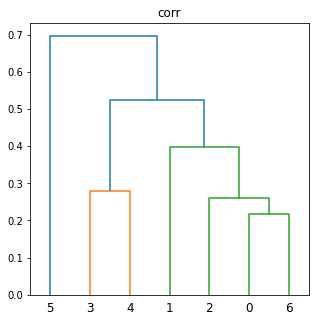

In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

corr = corr_na.values

plt.figure(figsize=(5,5))
plt.title('corr')
dend=sch.dendrogram(sch.linkage(corr_na,method='complete')) #method 설정 가능

pdist = sch.distance.pdist(corr)
predict=pd.DataFrame(sch.fcluster(sch.linkage(corr_na ,method='complete'),0.7* pdist.max() ,criterion='distance'))
predict.columns=['predict']
predict

# 국가 클러스터링 반영

In [65]:
predict['nationality'] = sorted(set({'ETC','IDN','JPN','MYS','SGP','THA','VNM'}))
predict

,predict,nationality
0,2,ETC
1,2,IDN
2,2,JPN
3,1,MYS
4,1,SGP
5,3,THA
6,2,VNM


In [66]:
temp2 = pd.merge(temp_1, predict, on='nationality', how='outer')

In [67]:
temp2= temp2.fillna(9)
temp2

,year_month,nationality,time,emd_cd,visit_pop_cnt,em_cnt,em_g,pay_amt,predict
0,2018-01,CHN,325977,1309580424790,2.035581e+06,923729,2410146150,71661996,9.0
1,2018-02,CHN,292250,1170804065190,2.259782e+06,857571,2237663300,66617693,9.0
2,2018-03,CHN,329091,1318647693370,3.076561e+06,963207,2451217550,72928625,9.0
3,2018-04,CHN,326647,1310430486890,2.849710e+06,946849,2253441550,67048102,9.0
4,2018-05,CHN,332385,1330828785290,2.949531e+06,1044433,2313361350,68840476,9.0
...,...,...,...,...,...,...,...,...,...
415,2021-02,VNM,27747,110612225842,1.856250e+02,476314,1195707984,35730814,2.0
416,2021-03,VNM,22496,90918836823,4.187567e+02,592264,1480264408,44236503,2.0
417,2021-04,VNM,31676,126460235893,6.327198e+02,501025,1252357991,37420509,2.0
418,2021-05,VNM,24136,98539613271,4.161416e+02,643724,1439035550,42979648,2.0


In [68]:
stf_cluster = pd.DataFrame(columns= list(set(temp_1['nationality'])))
predict.set_index('nationality', inplace=True)

In [69]:
stf_cluster = pd.concat([stf_cluster, predict.T], join='outer')
stf_cluster= stf_cluster.fillna(9)
stf_cluster

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,CHN,ETC,HKG,IDN,JPN,MYS,SGP,THA,USA,VNM
predict,9,2,9,2,2,1,1,3,9,2


# 배출량과 클러스터 사이의 상관관계

In [71]:
temp3= temp2.groupby(['year_month','predict']).sum().reset_index()

In [74]:
# 국가 클러스터링별  배출량과 tot 상관관계 차분, 지연
for i in sorted(set(temp3['predict'])):
    print(i)
    temp_list = [np.nan]
    temp = temp3[temp3['predict']==i]
    temp['em_g']= temp['em_g'].diff()
    temp['visit_pop_cnt']= temp['visit_pop_cnt'].diff()
    temp['visit_pop_cnt']= temp['visit_pop_cnt'].shift(1)
    emp= temp.dropna(axis=0)
    temp_corr = temp[['em_g', 'visit_pop_cnt']].corr()
    print(round(temp_corr.iloc[0,1],2))

1.0
0.37
2.0
0.08
3.0
-0.13
9.0
-0.14


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [75]:
# 국가 클러스터링별  배출량과 tot 상관관계 로그, 지연
for i in sorted(set(temp3['predict'])):
    print(i)
    temp_list = [np.nan]
    temp = temp3[temp3['predict']==i]
    temp['visit_pop_cnt']= temp['visit_pop_cnt'].shift(1)
    emp= temp.dropna(axis=0)
    temp_corr = np.log(temp[['em_g', 'visit_pop_cnt']].corr())
    print(round(temp_corr.iloc[0,1],2))

1.0
-0.18
2.0
-0.32
3.0
-0.95
9.0
nan


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


# 행정동별로 완전 다시

In [6]:
stf

,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,year_month
0,1,CHN,제주시,50110250,한림읍,66.3170,2018-01
1,1,ETC,제주시,50110250,한림읍,21.1308,2018-01
2,1,HKG,제주시,50110250,한림읍,3.6771,2018-01
3,1,JPN,제주시,50110250,한림읍,5.5962,2018-01
4,1,USA,제주시,50110250,한림읍,3.9078,2018-01
...,...,...,...,...,...,...,...
6059039,24,USA,서귀포시,50130610,중문동,9.2120,2021-06
6059040,24,CHN,서귀포시,50130610,중문동,0.6039,2021-06
6059041,24,ETC,서귀포시,50130610,중문동,11.5473,2021-06
6059042,24,CHN,서귀포시,50130620,예래동,0.2013,2021-06


In [3]:
corr_data

,cluster,IDN,MYS,HKG,JPN,SGP,VNM,ETC,CHN,USA,THA
0,1,0.11,0.53,0.15,0.03,0.26,0.26,-0.17,-0.17,0.03,-0.13
1,2,0.04,0.17,0.15,-0.32,0.37,-0.02,0.04,-0.18,-0.01,-0.12
2,3,0.04,0.18,0.27,0.03,0.2,0.11,-0.17,-0.18,0.12,-0.09
3,4,-0.29,0.13,0.21,0.11,0.23,0.22,0.09,-0.07,0.21,0.18
4,5,0.08,0.17,0.22,0.18,0.24,0.24,0.08,0.04,0.19,0.17
5,6,-0.01,0.1,0.2,-0.09,0.11,0,-0.14,-0.2,-0.12,-0.02
6,7,0.05,0.27,0.34,0.07,0.27,0.01,0.16,0.01,0.11,-0.04
7,8,0.17,0.16,0.22,-0.06,0.13,-0.08,-0.06,-0.14,0.02,-0.05
8,9,0.2,0.16,0.38,0.19,0.23,0.23,-0.18,-0.21,-0.02,-0.09


In [5]:
corr_data_log

,cluster,IDN,MYS,HKG,JPN,SGP,VNM,ETC,CHN,USA,THA
0,1,0.69,0.88,0.72,0.7,0.91,0.79,0.6,0.59,0.68,0.85
1,2,0.42,0.43,0.52,0.29,0.31,0.58,0.45,0.44,0.45,0.2
2,3,0.61,0.57,0.7,0.61,0.72,0.64,0.3,0.31,0.52,0.69
3,4,0.28,0.6,0.54,0.74,0.58,0.46,-0.05,-0.27,0.03,0.27
4,5,-0.08,-0.08,-0.2,0.02,0.15,0.06,-0.44,-0.54,-0.28,-0.12
5,6,-0.27,-0.03,-0.41,0.25,-0.19,-0.14,-0.72,-0.76,-0.46,-0.71
6,7,0.69,0.79,0.58,0.84,0.73,0.76,0.28,0.24,0.09,0.57
7,8,-0.65,-0.75,-0.84,-0.41,-0.62,-0.66,-0.76,-0.79,-0.69,-0.81
8,9,0.4,0.48,-0.2,0.55,0.53,0.55,-0.43,-0.38,-0.32,-0.02


In [2]:
# 패키지 불러오기
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()

# 데이터 불러오기
food_waste = pd.read_csv("01_음식물쓰레기_FOOD_WASTE_210811_update.CSV", encoding="cp949")
short_term_frgn = pd.read_csv("02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV", encoding="cp949")
emd_cluster = pd.read_csv('클러스터링 최종.csv')

# 카드데이터, 음식물 데이터 합치기
stf = short_term_frgn.copy()
fw = food_waste.copy()
cluster= emd_cluster.copy()

## 다운샘플링
def get_year_month(x):
    return x[0:7]

stf['year_month'] = stf['base_date'].apply(lambda x: get_year_month(x))
stf = stf.drop(['base_date'], axis=1, inplace=False)
stf_1 = stf.groupby(['year_month','nationality','emd_nm']).sum().reset_index()

fw['year_month'] = fw['base_date'].apply(lambda x: get_year_month(x))
fw = fw.drop(['base_date'], axis=1, inplace=False)
fw_1 = fw.groupby(['year_month','emd_nm']).sum().reset_index()

## 결측값 없이 두 데이터셋 merge
temp_1 = pd.merge(stf_1, fw_1, on=['year_month', 'emd_nm'])

# 1. 행정동 클러스터별, 카테고리별, 배출량과 카드소비량 상관관계 분석
## 행정동 클러스터링 데이터 정제
cl= cluster.drop(['관광인구','거주인구','spot'], axis=1, inplace=False)
cl.rename(columns={'행정동명':'emd_nm'}, inplace=True)
cl.rename(columns={'행정동코드':'emd_cd'}, inplace=True)

## 음식물 쓰레기 배출량, 카드데이터, 행정동 클러스터링 모두 합쳐진 데이터셋
df = pd.merge(temp_1, cl, on=['emd_nm'])

## 월별 행정동 클러스터별, 카테고리 기준으로 합친 데이터셋
df2 = df.groupby(['year_month','nationality','cluster']).sum().reset_index()

## lag(1), diff() 상관관계
corr_data = pd.DataFrame(index=range(0,len(set(df['cluster']))),columns = ['cluster']+list(set(df['nationality'])))
n = 0
for i in tqdm(range(1,10)):
    print(i)
    temp_list = [np.nan]
    temp1 = df2[df2['cluster']==i]
    temp_2 = temp1
    for j in set(temp1['nationality']):
        temp2 = temp1[temp1['nationality']==j]
        temp2['em_g']= temp2['em_g'].diff()
        temp2['visit_pop_cnt']= temp2['visit_pop_cnt'].diff()
        temp2['visit_pop_cnt']= temp2['visit_pop_cnt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = temp2[['em_g', 'visit_pop_cnt']].corr()
        print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data.iloc[n,:] = temp_list
    n += 1
corr_data['cluster'] = set(df['cluster'])

## 상관계수 확인
corr_data

# 로그변환, lag(1) 후 상관관계
corr_data_log = pd.DataFrame(index=range(0,len(set(df['cluster']))),columns = ['cluster']+list(set(df['nationality'])))
n = 0
for i in tqdm(range(1,10)):
    print(i)
    temp_list = [np.nan]
    temp1 = df2[df2['cluster']==i]
    for j in set(temp1['nationality']):
        temp2 = temp1[temp1['nationality']==j]
        temp2['visit_pop_cnt']= temp2['visit_pop_cnt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = np.log(temp2[['em_g', 'visit_pop_cnt']]).corr()
        print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data_log.iloc[n,:] = temp_list
    n += 1
    corr_data_log['cluster'] = set(df['cluster'])

## 상관계수 확인
corr_data_log

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
  0%|          | 0/9 [00:00<?, ?it/s]/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/inde

1
0.11
0.53
0.15
0.03
0.26
0.26
-0.17
-0.17
0.03
-0.13
2
0.04
0.17
0.15
-0.32
0.37
-0.02
0.04
-0.18
-0.01
-0.12
3
0.04
0.18
0.27
0.03
0.2
0.11
-0.17
-0.18
0.12
-0.09
4
-0.29
0.13
0.21
0.11
0.23
0.22
0.09
-0.07


 67%|██████▋   | 6/9 [00:00<00:00, 19.30it/s]

0.21
0.18
5
0.08
0.17
0.22
0.18
0.24
0.24
0.08
0.04
0.19
0.17
6
-0.01
0.1
0.2
-0.09
0.11
0.0
-0.14
-0.2
-0.12
-0.02
7
0.05
0.27
0.34
0.07
0.27
0.01
0.16
0.01
0.11
-0.04
8
0.17
0.16
0.22
-0.06
0.13
-0.08
-0.06
-0.14


  0%|          | 0/9 [00:00<?, ?it/s]/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log


0.02
-0.05
9
0.2
0.16
0.38
0.19
0.23
0.23
-0.18
-0.21
-0.02
-0.09
1
0.69
0.88
0.72
0.7
0.91
0.79
0.6
0.59
0.68
0.85
2
0.42
0.43
0.52
0.29
0.31
0.58
0.45
0.44
0.45
0.2
3
0.61
0.57
0.7
0.61
0.72
0.64
0.3
0.31


 56%|█████▌    | 5/9 [00:00<00:00, 19.68it/s]

0.52
0.69
4
0.28
0.6
0.54
0.74
0.58
0.46
-0.05
-0.27
0.03
0.27
5
-0.08
-0.08
-0.2
0.02
0.15
0.06
-0.44
-0.54
-0.28
-0.12
6
-0.27
-0.03
-0.41
0.25
-0.19
-0.14
-0.72
-0.76
-0.46
-0.71
7
0.69
0.79
0.58
0.84
0.73
0.76
0.28


100%|██████████| 9/9 [00:00<00:00, 19.41it/s]

0.24
0.09
0.57
8
-0.65
-0.75
-0.84
-0.41
-0.62
-0.66
-0.76
-0.79
-0.69
-0.81
9
0.4
0.48
-0.2
0.55
0.53
0.55
-0.43
-0.38
-0.32
-0.02


,cluster,IDN,MYS,HKG,JPN,SGP,VNM,ETC,CHN,USA,THA
0,1,0.69,0.88,0.72,0.7,0.91,0.79,0.6,0.59,0.68,0.85
1,2,0.42,0.43,0.52,0.29,0.31,0.58,0.45,0.44,0.45,0.2
2,3,0.61,0.57,0.7,0.61,0.72,0.64,0.3,0.31,0.52,0.69
3,4,0.28,0.6,0.54,0.74,0.58,0.46,-0.05,-0.27,0.03,0.27
4,5,-0.08,-0.08,-0.2,0.02,0.15,0.06,-0.44,-0.54,-0.28,-0.12
5,6,-0.27,-0.03,-0.41,0.25,-0.19,-0.14,-0.72,-0.76,-0.46,-0.71
6,7,0.69,0.79,0.58,0.84,0.73,0.76,0.28,0.24,0.09,0.57
7,8,-0.65,-0.75,-0.84,-0.41,-0.62,-0.66,-0.76,-0.79,-0.69,-0.81
8,9,0.4,0.48,-0.2,0.55,0.53,0.55,-0.43,-0.38,-0.32,-0.02


In [79]:
# 2. 카테고리별 배출량과의 상관계수 확인

## 클러스터별 상관계수 |0.3| 이상인 카테고리 추출 & csv 파일로 추출
arr = corr_data_log.values
index_names = corr_data_log.cluster
col_names = corr_data_log.columns

R,C = np.where((arr>=0.3) & (arr < 1) |(arr <= -0.3))

out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['cluster','nationality','corr']])
df_out.to_csv('corr_rank3.csv', header=True, index=False, encoding='cp949')

## 카테고리끼리 상관관계 구하기 
corr_rank= pd.read_csv('corr_rank3.csv', encoding='cp949')

for i in tqdm(range(1,10)):
    print(i)
    temp = corr_rank[corr_rank['cluster']==i]
    temp2 = df2[df2['cluster']==i]
    mct_list = set(temp['nationality'])
    corr_data_3 = pd.DataFrame(columns = sorted(mct_list))
    for j in mct_list:
        temp22 = temp2[temp2['nationality'] == j]
        corr_data_3.loc[:,j] = temp22.T.loc['visit_pop_cnt'].reset_index(drop=True).astype(int)
        corr = corr_data_3.corr()
    out = pd.DataFrame(corr)
    exec("c"+str(i)+"= pd.DataFrame(out)")

 22%|██▏       | 2/9 [00:00<00:00, 18.94it/s]

1
2
3
4
5
6


100%|██████████| 9/9 [00:00<00:00, 24.50it/s]

7
8
9


1
   stf_cluster
0            1
1            1
2            1
3            1
4            1
5            1
6            1
7            2
8            1
9            1
2
   stf_cluster
0            1
1            1
2            1
3            3
4            1
5            1
6            1
7            2
3
   stf_cluster
0            2
1            2
2            3
3            3
4            1
5            1
6            1
7            2
8            1
9            3
4
   stf_cluster
0            2
1            2
2            1
3            1
4            2
5
   stf_cluster
0            1
1            2
6
   stf_cluster
0            1
1            1
2            2
3            3
4            1
7
   stf_cluster
0            1
1            2
2            2
3            2
4            3
5            2
6            1
8
   stf_cluster
0            1
1            1
2            1
3            1
4            1
5            1
6            1
7            2
8            1
9            1
9
   stf_

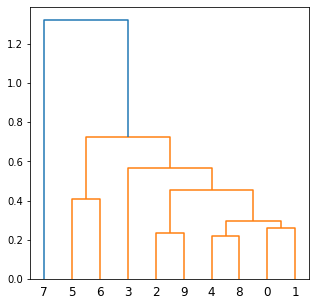

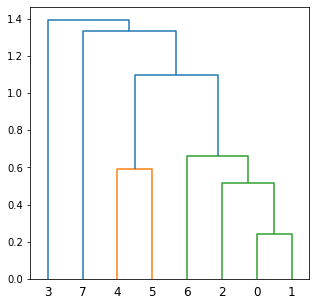

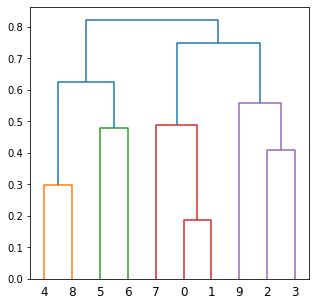

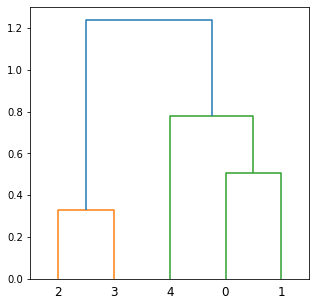

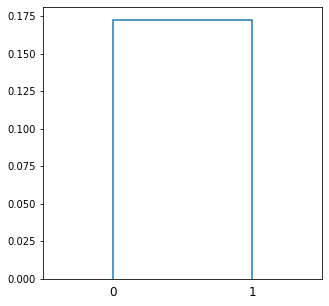

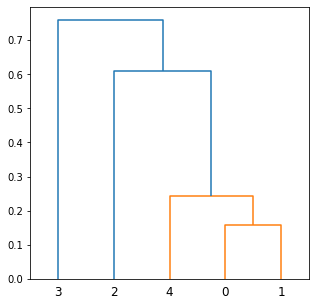

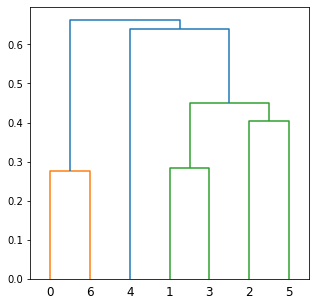

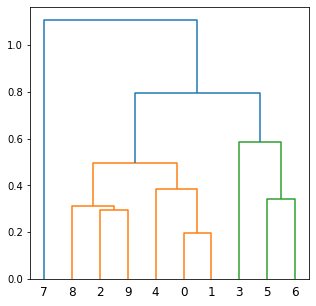

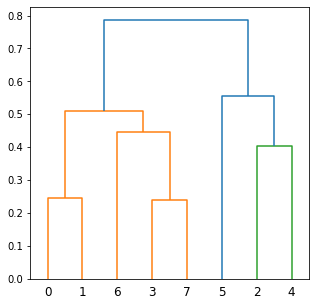

In [91]:
# 3. 상관계수로 카테고리 클러스터링 진행
## 계층 시각화
for i in range(1,10):
    plt.figure(figsize=(5,5))
    exec("dend=sch.dendrogram(sch.linkage(c" + str(i) + ",method='complete'))" )#method 설정 가능

## 클러스터링 결과 저장
for i in range(1,10):
    exec("corr=c"+str(i)+".values")
    pdist = sch.distance.pdist(corr)
    exec("predict" +str(i) + "=pd.DataFrame(sch.fcluster(sch.linkage(c" + str(i) +",method='complete'),0.8 * pdist.max() ,criterion='distance'))")
    exec("predict"+ str(i)+ ".columns=['stf_cluster']")

## 클러스터링 결과 확인
for i in range(1,10):
    print(i)
    exec("corr=c"+str(i)+".values")
    pdist = sch.distance.pdist(corr)
    exec("predict =pd.DataFrame(sch.fcluster(sch.linkage(c" + str(i) +",method='complete'),0.8 * pdist.max(),criterion='distance'))")
    predict.columns=['stf_cluster']
    print(predict)

## 카테고리 클러스터링 결과 정리된 데이터 프레임 생성
for i in range(1,10): #여기서 i는 행정동별 클러스터
    exec("predict"+ str(i)+ "['nationality']= c" + str(i)+ ".columns") #행정동별, 카데고리별 클러스터링 결과 병합

    # 배출량, 카드데이터 합친 df2에서 행정동별 클러스터링 같은 것 추출해서, 위의 데이터와 합침
    exec("df2_"+str(i)+ "=pd.merge(df2[df2['cluster']==" + str(i)+ "], predict" + str(i) + ", on='nationality', how='outer')")
    exec("df2_"+str(i)+ "=df2_"+str(i)+ ".fillna(9)") #카테고리 클러스터링 안된것은 9로 
    exec("df3_"+ str(i)+ "= df2_"+ str(i)+".groupby(['year_month','stf_cluster']).sum().reset_index()") # 최종적으로 카테고리별 클러스터링 된 것끼리 합


In [92]:
stf_cluster = pd.DataFrame(columns= list(set(df2['nationality'])))
for i in range(1,10):
    exec("predict"+str(i)+".set_index('nationality',inplace = True)")
    exec("stf_cl"+ str(i)+"=pd.concat([stf_cluster, predict" + str(i)+ ".T], join='outer')")

aa= pd.concat([stf_cl1, stf_cl2, stf_cl3, stf_cl4, stf_cl5, stf_cl6, stf_cl7, stf_cl8, stf_cl9], axis=0)
aa= aa.fillna(9)
aa= aa.reset_index(drop=True)
aa.loc[:,'emd_cluster'] = pd.Series([1,2,3,4,5,6,7,8,9] , index= aa.index)

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [93]:
# 4. 행정동 클러스터별, 카드내역 카테고리 클러스터별, 배출량과 카드소비액 사이의 상관관계
## 차분&지연
for i in range(1,10):
    # n=0
    # exec("corr_data_" +str(i) + "= pd.DataFrame(index= range(0,1),columns =list(set(df3_"+str(i)+"['stf_cluster'])))")      
    print(i)
    exec("temp_list_"+str(i)+" = [np.nan]")
    exec("temp1= df3_"+ str(i))
    
    for j in set(temp1['stf_cluster']):
        temp2 = temp1[temp1['stf_cluster']==j]
        temp2['em_g']= temp2['em_g'].diff()
        temp2['visit_pop_cnt']= temp2['visit_pop_cnt'].diff()
        temp2['visit_pop_cnt']= temp2['visit_pop_cnt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = temp2[['em_g', 'visit_pop_cnt']].corr()
        print(round(temp_corr.iloc[0,1],2))

1
0.16
-0.13
2
-0.01
-0.02
0.04
-0.17
3
0.31
-0.16
0.29
4
0.21
0.27
0.03
5
0.04
0.08
0.56
6
-0.18
0.2
-0.02
0.02
7
0.3
0.23
0.27
0.06
8
-0.08
-0.05
9
-0.11
0.33
0.11


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [94]:
## 로그&지연
for i in range(1,10):
    # n=0
    #exec("corr_data_" +str(i) + "= pd.DataFrame(index= range(0,1),columns =list(set(df3_"+str(i)+"['stf_cluster'])))")      
    print(i)
    exec("temp_list_"+str(i)+" = [np.nan]")
    exec("temp1= df3_"+ str(i))
    
    for j in set(temp1['stf_cluster']):
        temp2 = temp1[temp1['stf_cluster']==j]
        temp2['visit_pop_cnt']= temp2['visit_pop_cnt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = np.log(temp2[['em_g', 'visit_pop_cnt']]).corr()
        print(round(temp_corr.iloc[0,1],2))

1
0.94
0.85
2
0.74
0.58
0.42
0.58
3
0.86
0.5
0.86
4
0.77
0.73
0.04
5
-0.54
-0.44
0.04
6
-0.71
-0.41
-0.71
-0.21
7
0.82
0.82
0.73
0.27
8
-0.75
-0.81
9
0.06
0.6
-0.1


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
